## DSCI 100 007 Group 37

- #####  Preliminary exploratory data analysis

In [88]:
install.packages("psych")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [89]:
library(tidyverse)
library(ggplot2)
library(psych)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(repr)

##### Step 1 : read data from url

In [90]:
path <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <-read_csv(path)
heart_disease_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


##### Step 2 : Naming and filtering data

In [91]:
# Give each column a specific name from given dataset
heart_disease_data <- read_csv(path, col_names = FALSE) |> 
  set_names(c("age", "sex", "cp", "trestbpd", "chol", "fbs", "restecg", "thalach",
              "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [92]:
# Now let's add a new column that includes the number of patients.
heart_disease_data <- heart_disease_data |>
  mutate(patient_number = row_number()) |>
  select(patient_number, everything())
heart_disease_data

patient_number,age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
303,38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [93]:
# We will use the select function to keep only the variables trestbps (#5) the  and cholesterol (#6), 
# and num (#14) the predicted heart disease outcome.

filtered_heart_disease_data <- heart_disease_data |>
  select(1, 5, 6, 15)
filtered_heart_disease_data

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<dbl>
1,145,233,0
2,160,286,2
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,3
302,130,236,1
303,138,175,0


In [94]:
changed_num <- filtered_heart_disease_data |>
  mutate(num = ifelse(num >= 1, 1, 0))
# remove all row with '?'
changed_num_1 <- changed_num |>
  filter_all(all_vars(. != "?"))
changed_num_1

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<dbl>
1,145,233,0
2,160,286,1
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,1
302,130,236,1
303,138,175,0


In [95]:
final_data <- changed_num_1
final_data <- final_data |>
    mutate(num = as_factor(num))
final_data

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
1,145,233,0
2,160,286,1
3,120,229,1
⋮,⋮,⋮,⋮
301,130,131,1
302,130,236,1
303,138,175,0


In [160]:
describe(final_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
patient_number,1,303,152.000000,87.6127845,152,152.00000,112.6776,1,303,302,0.0000000,-1.2118876,5.03322296
trestbpd,2,303,131.689769,17.5997477,130,130.49383,14.8260,94,200,106,0.6990596,0.8205378,1.01107909
chol,3,303,246.693069,51.7769175,241,243.96708,47.4432,126,564,438,1.1242853,4.3494558,2.97450619
num*,4,303,1.458746,0.4991195,1,1.44856,0.0000,1,2,1,0.1647620,-1.9793533,0.02867367


In [96]:
set.seed(9999)

heart_disease_split <- initial_split(final_data, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)
heart_disease_train
heart_disease_test

patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
1,145,233,0
4,130,250,0
5,130,204,0
⋮,⋮,⋮,⋮
298,140,241,1
299,110,264,1
301,130,131,1


patient_number,trestbpd,chol,num
<int>,<dbl>,<dbl>,<fct>
2,160,286,1
8,120,354,0
9,130,254,1
⋮,⋮,⋮,⋮
300,144,193,1
302,130,236,1
303,138,175,0


In [97]:
describe(heart_disease_train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
patient_number,1,227,150.63436,86.0285159,153,150.737705,108.2298,1,301,300,-0.03128286,-1.1991285,5.7099131
trestbpd,2,227,131.79736,18.1557517,130,130.546448,14.8260,94,200,106,0.72722291,0.9437541,1.2050396
chol,3,227,246.56388,53.8300268,240,244.049180,50.4084,126,564,438,1.17388445,4.7696730,3.5728244
num*,4,227,1.45815,0.4993466,1,1.448087,0.0000,1,2,1,0.16688152,-1.9808185,0.0331428


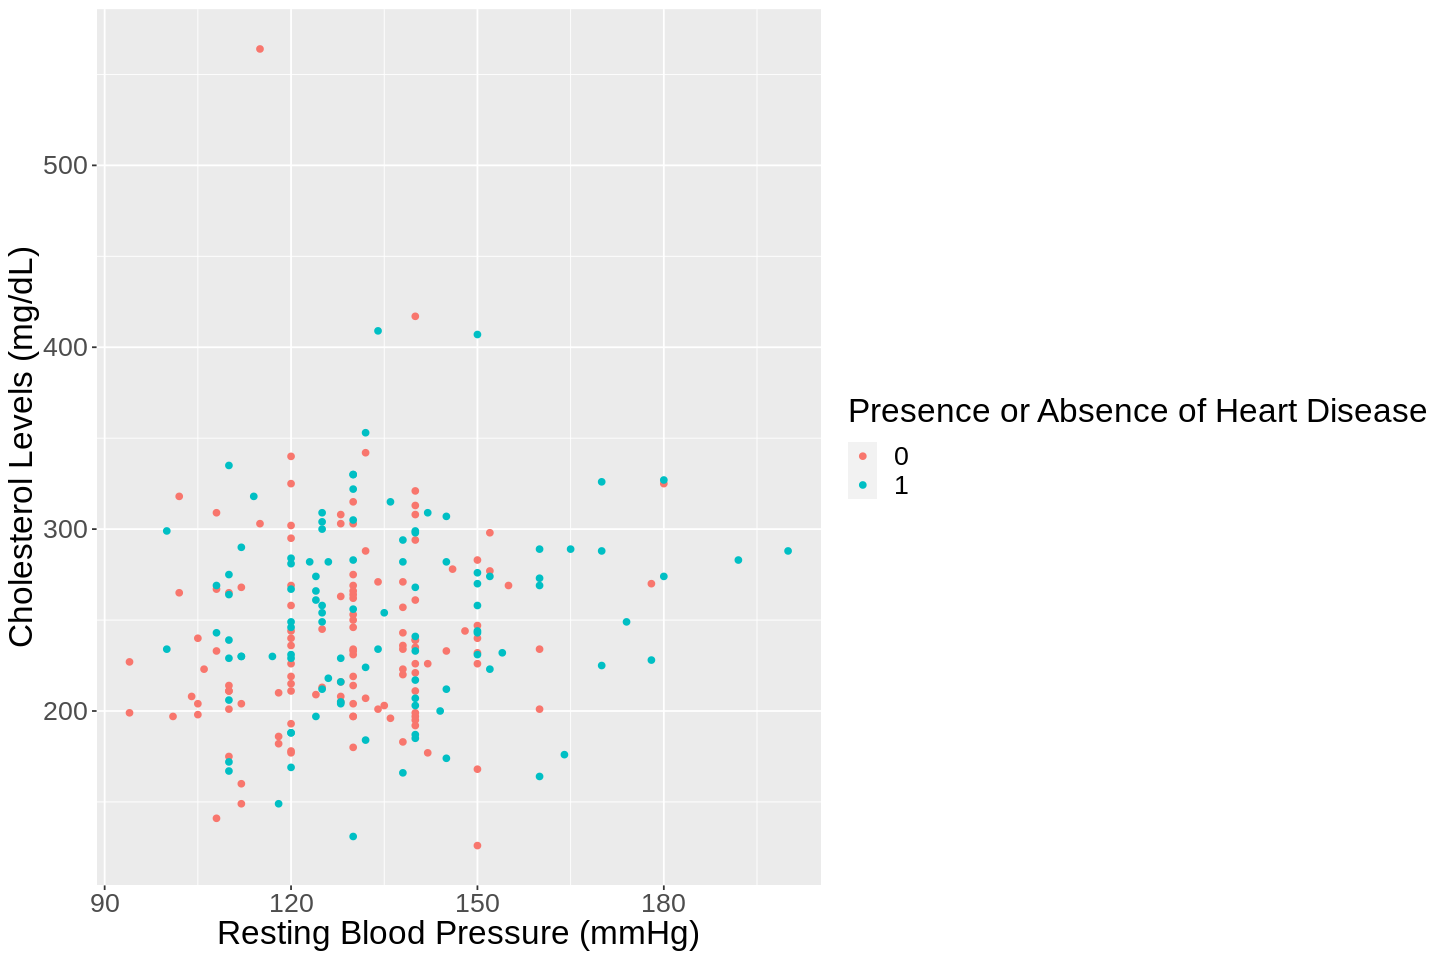

In [98]:
#scatterplot visualising the relationship between cholesterol, resting blood pressure, and heart disease
#1 means presence and 0 means absence of heart disease
#visualisation of dataset

options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot <- heart_disease_train |>
    ggplot(aes(x = trestbpd, y = chol, color = num))+
    geom_point() +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Cholesterol Levels (mg/dL)", colour = "Presence or Absence of Heart Disease")+
    theme(text = element_text(size = 20))
heart_disease_plot

In [99]:
#create model, recipe, and tune workflow to perform 5 fold cross-validation to select the best k in the range 1-10
#collect_metrics() used return a table that tells the classifier's mean and standard error

set.seed(9999)

heart_disease_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("classification")
heart_disease_tune

heart_disease_recipe <- recipe(num ~ trestbpd + chol, data = heart_disease_train)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())
heart_disease_recipe

heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)

grid_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 2))

heart_disease_tune_workflow <- workflow()|>
    add_recipe(heart_disease_recipe)|>
    add_model(heart_disease_tune)|>
    tune_grid(resamples = heart_disease_vfold, grid = grid_vals)|>
    collect_metrics()
heart_disease_tune_workflow
    

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5285112,5,0.03372112,Preprocessor1_Model01
1,roc_auc,binary,0.5248810,5,0.03234991,Preprocessor1_Model01
3,accuracy,binary,0.5421432,5,0.01680975,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,roc_auc,binary,0.5963274,5,0.01777977,Preprocessor1_Model49
99,accuracy,binary,0.5550812,5,0.01197949,Preprocessor1_Model50
99,roc_auc,binary,0.5890020,5,0.01967669,Preprocessor1_Model50


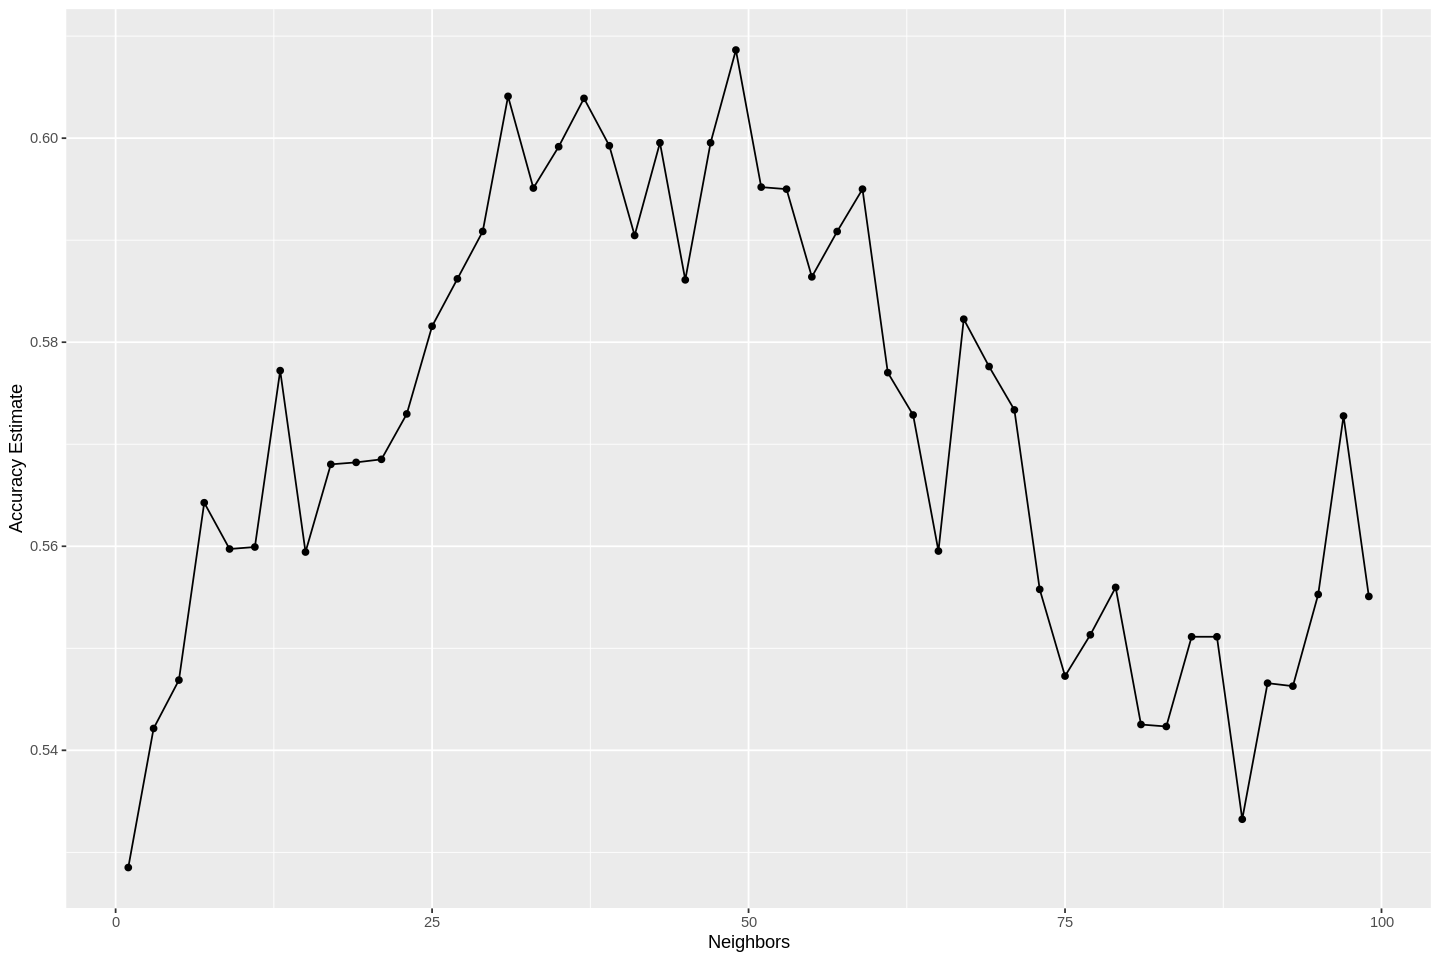

In [110]:
#now make a plot to determine which k gives the highest accuracy to find the best k

accuracies <- heart_disease_tune_workflow|>
    filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point()+
    geom_line()+
    labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_vs_k

In [126]:
#to determine the best k value
accuracies1 <- heart_disease_tune_workflow|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(desc(mean))
accuracies1

neighbors,mean
<dbl>,<dbl>
49,0.6086386
31,0.6040975
37,0.6038999
⋮,⋮
3,0.5421432
89,0.5332455
1,0.5285112


In [128]:
#make a new model specification for the best k and retrain classifier using fit

set.seed(9999)

heart_disease_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 49)|>
    set_engine("kknn")|>
    set_mode("classification")


heart_disease_best_fit <- workflow()|>
    add_recipe(heart_disease_recipe)|>
    add_model(heart_disease_model)|>
    fit(data = heart_disease_train)
heart_disease_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(49,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4361233
Best kernel: rectangular
Best k: 49

In [146]:
heart_disease_prediction <- heart_disease_best_fit |>
        predict(heart_disease_test) |>
        bind_cols(heart_disease_test)|>
        metrics(truth = num, estimate = .pred_class)
heart_disease_prediction

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4605263
kap,binary,-0.1208633


In [152]:
#confusion matrix of test data to show the table of predicted labels and correct labels 

confusion_test<- heart_disease_best_fit |>
        predict(heart_disease_test) |>
        bind_cols(heart_disease_test)|>
    conf_mat(truth = num, estimate = .pred_class)
confusion_test  

          Truth
Prediction  0  1
         0 28 28
         1 13  7

In [159]:
#Finding the proportion of how many have heart disease and how many does not have heart disease based on the original data set 

class_proportion <- final_data|>
  group_by(num)|>
  summarize(class_proportion = n())
class_proportion

class_percentage <- class_proportion|>
    mutate(percentage_proportion = (class_proportion/303)*100)
class_percentage

num,class_proportion
<fct>,<int>
0,164
1,139


num,class_proportion,percentage_proportion
<fct>,<int>,<dbl>
0,164,54.12541
1,139,45.87459


In [143]:
#Metrics for original test data

whole_data_heart_disease_prediction <- heart_disease_best_fit |>
        predict(final_data) |>
        bind_cols(final_data)|>
        metrics(truth = num, estimate = .pred_class)
whole_data_heart_disease_prediction        

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.55775578
kap,binary,0.08331076


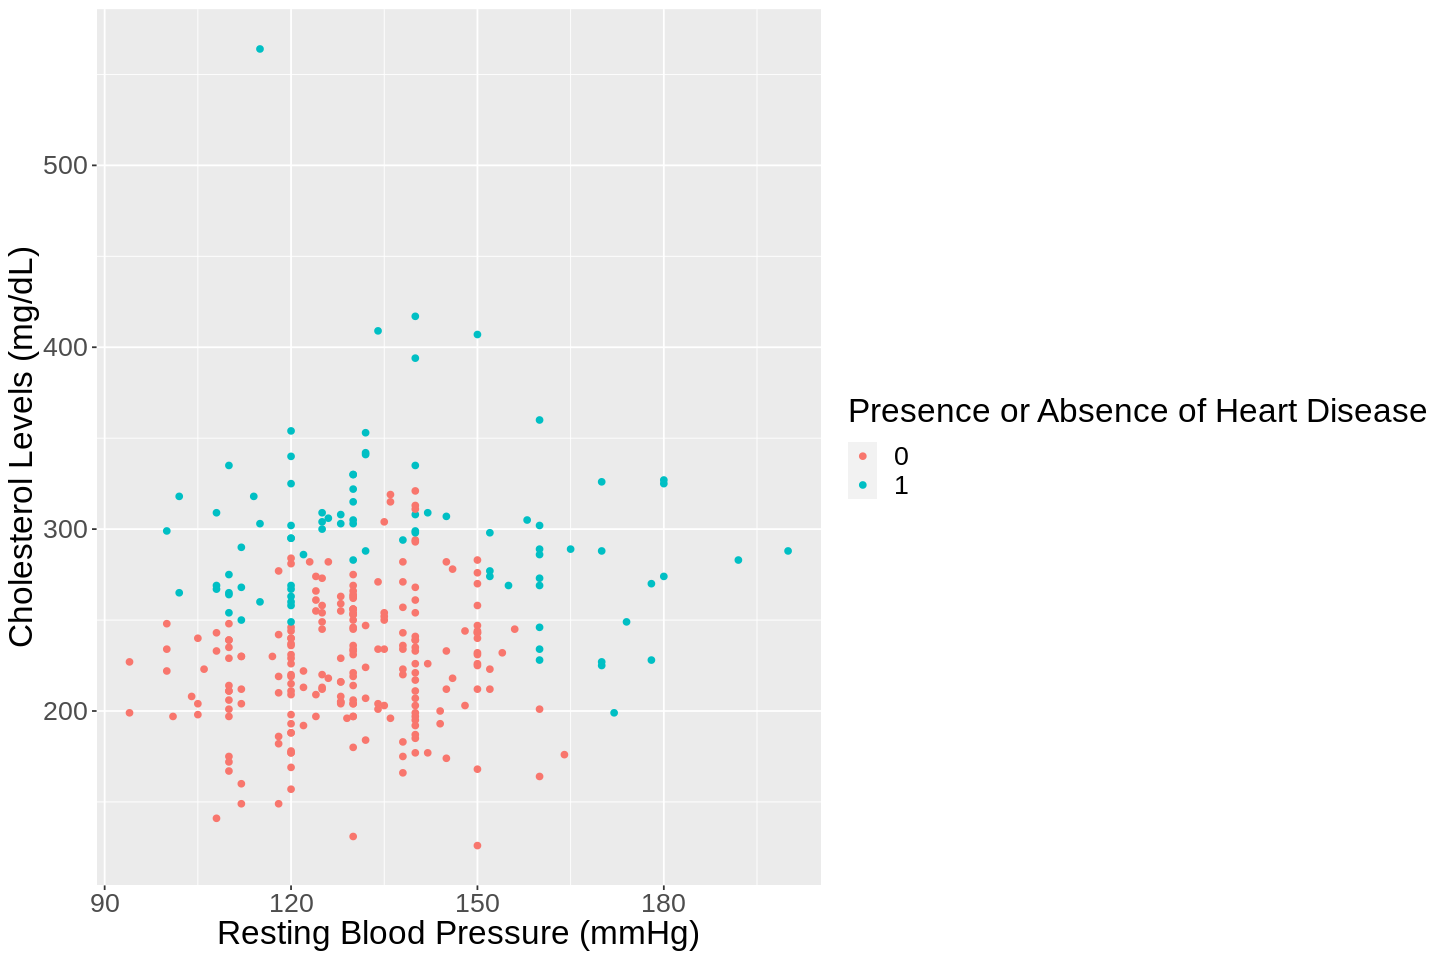

In [151]:
#visualisation of analysis

whole_data_heart_disease_pred <- heart_disease_best_fit |>
        predict(final_data)|>
        bind_cols(final_data)

analysis_plot <- whole_data_heart_disease_pred|>
    ggplot(aes(x = trestbpd, y = chol, color = .pred_class))+
    geom_point() +
    labs(x = "Resting Blood Pressure (mmHg)", y = "Cholesterol Levels (mg/dL)", colour = "Presence or Absence of Heart Disease")+
    # ggtitle(The 
    theme(text = element_text(size = 20))
analysis_plot

